In [2]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

warnings.filterwarnings("ignore")

# loading data
>Load the data

>Change columns names

>Change columns data types, (`date_sold` to datetime, `bedroms` to str)

In [3]:
# Load the data
df = pd.read_csv(r"C:\Users\TCS\Desktop\house_sales_time_series\raw_sales.csv")
# df_ma = pd.read_csv("ma_lga_12345.csv")

In [6]:
df

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [4]:
# Change column names for calrity
df.rename(
    columns={
        "datesold": "date_sold",
        "postcode": "post_code",
        "bedrooms": "bedrooms",
        "propertyType": "property_type",
    },
    inplace=True,
)

In [8]:
df.head()

,date_sold,post_code,price,property_type,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [5]:
# Change the date_sold column to datetime
df["date_sold"] = pd.to_datetime(df["date_sold"])

# Add a column for the month
df["month"] = df["date_sold"].dt.to_period("M")

# Set the index to date_sold
df.set_index("date_sold", inplace=True)

# organize the data
df = df[[df.columns[-1]] + df.columns[:-1].tolist()]

# Change postcode to string
df["post_code"] = df["post_code"].astype(str)

# Change bedrooms to category
df["bedrooms"] = df["bedrooms"].astype("category")

# Add year column
df["year"] = df.index.year

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29580 entries, 2007-02-07 to 2019-07-26
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype    
---  ------         --------------  -----    
 0   month          29580 non-null  period[M]
 1   post_code      29580 non-null  object   
 2   price          29580 non-null  int64    
 3   property_type  29580 non-null  object   
 4   bedrooms       29580 non-null  int64    
dtypes: int64(2), object(2), period[M](1)
memory usage: 1.4+ MB


In [23]:
df

,month,post_code,price,property_type,bedrooms
date_sold,,,,,
2007-02-07,2007-02,2607,525000,house,4
2007-02-27,2007-02,2906,290000,house,3
2007-03-07,2007-03,2905,328000,house,3
2007-03-09,2007-03,2905,380000,house,4
2007-03-21,2007-03,2906,310000,house,3
...,...,...,...,...,...
2019-07-25,2019-07,2900,500000,unit,3
2019-07-25,2019-07,2612,560000,unit,2
2019-07-26,2019-07,2912,464950,unit,2


In [106]:
df_ma

,saledate,MA,type,bedrooms
0,30/09/2007,441854,house,2
1,31/12/2007,441854,house,2
2,31/03/2008,441854,house,2
3,30/06/2008,441854,house,2
4,30/09/2008,451583,house,2
...,...,...,...,...
342,30/09/2018,603281,unit,3
343,31/12/2018,601167,unit,3
344,31/03/2019,605637,unit,3
345,30/06/2019,599339,unit,3


# exploration
### Exploration Findings

1. **Dataset Overview**
   - The raw_sales has `29,580` rows and `5` columns

2. **Missing Values**
   

3. **Feature Distributions**


4. **Relationships**
    - There are very strong relationship bewteen `post_code` and `price`
    - It seems that the prices of units are genrally lower
    -  We see that genrally when the number of bedroms increase the price increases, **But** the prices behaves weirldy at the 0 bedroms
    - A strong relation between the `month` and the `price` 
   
   
5. **Outliers**
    - the price has some outliers that we are going to remove by logarithmic transformation

6. **Time Trends**
    - As we are trying to predict the price of a unit, then the total price per month is not very relevent, but it increase gradually unitl it falls after 2018
    - The prices deacrese at the begining of each year, with yearly seasonlity
    - The trend goes up over time

7. **Preprocessing notes**
    - Change columns names
    - Logarithmic transformation to deal with outliers in the `price`
    - Fill the rows with `0 bedrooms` with the moving average of the brevious month

8. **Feature engineering notes**
    - Add new column to indentify outliers in the `price`
    - Add time based feautres, `day`, `year`, `month`

9. **Labeling notes**
    - `bedroom` (lebel encoding)
    - `post_code`, `property_type` (one hot encoding)
   

In [24]:
# Check for missing values
df.isnull().sum()

month            0
post_code        0
price            0
property_type    0
bedrooms         0
dtype: int64

In [51]:
df["property_type"].value_counts()

property_type
house    24552
unit      5028
Name: count, dtype: int64

In [58]:
df.groupby("property_type")["price"].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
house,24552.0,647956.128462,285349.654005,56500.0,475000.0,585000.0,739125.0,8000000.0
unit,5028.0,423106.557279,165280.592725,85000.0,323000.0,390000.0,476625.0,2500000.0


In [59]:
df["post_code"].nunique()

27

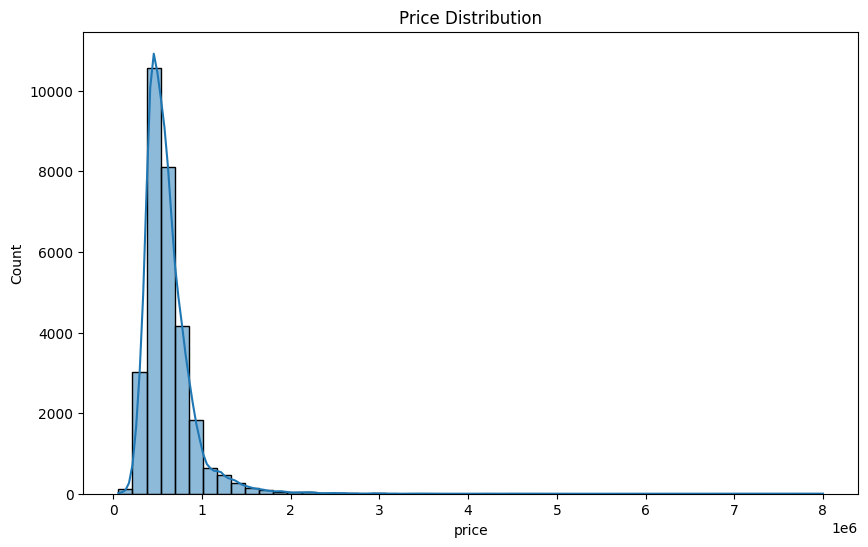

In [70]:
plt.figure(figsize=(10, 6))

sns.histplot(df["price"], kde=True, bins=50)
plt.title("Price Distribution");

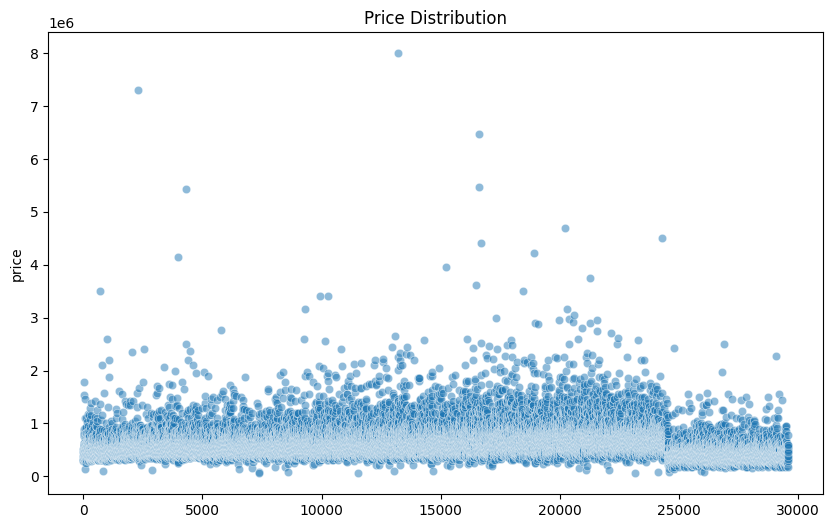

In [72]:
plt.figure(figsize=(10, 6))

sns.scatterplot(y=df["price"], x=np.arange(len(df)), alpha=0.5)
plt.title("Price Distribution");

From the pervious two graphs we see that there are some outliers in the data

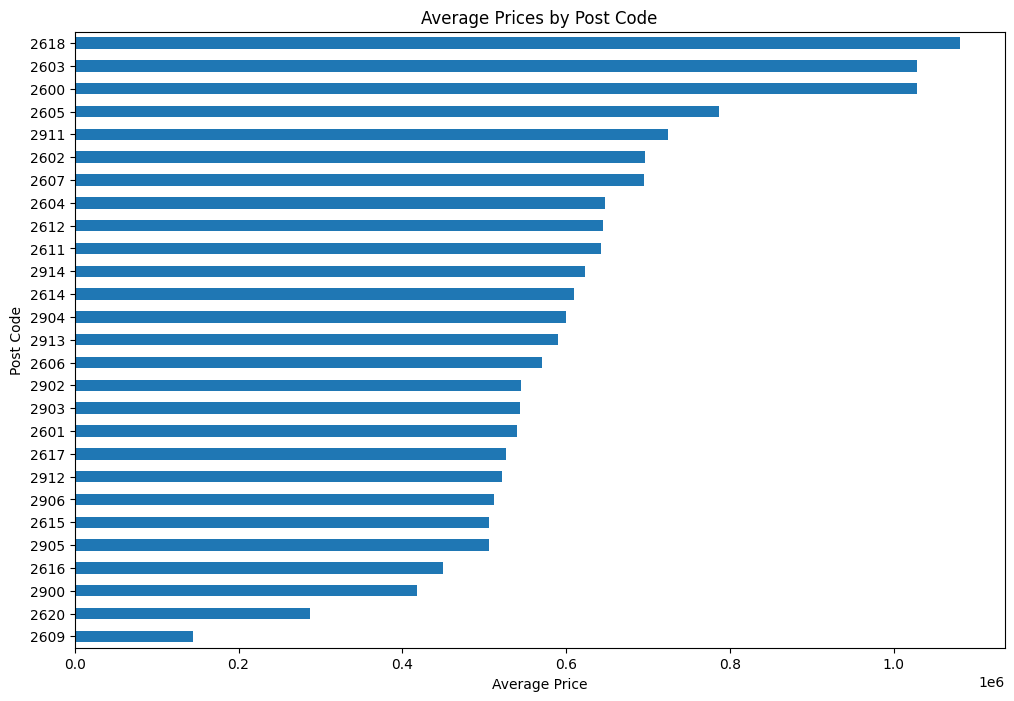

In [60]:
# Calculate the average price for each postal code
avg_prices = df.groupby("post_code")["price"].mean().sort_values()

# Plot the horizontal bar graph
plt.figure(figsize=(12, 8))
avg_prices.plot(kind="barh")
plt.xlabel("Average Price")
plt.ylabel("Post Code")
plt.title("Average Prices by Post Code")
plt.show()

We can see that there are strong relation bewteen the postal area and the prices

In [84]:
# Lets create a full scatter plot of the data

fig = px.scatter(
    df,
    x=np.arange(len(df)),
    y="price",
    color="property_type",
    # size="bedrooms",
    # symbol="property_type",
    title="Scatter Plot of Property Prices",
)
fig.show()


It seems that the prices of units are genrally lower

In [8]:
import plotly.express as px
import numpy as np

# Convert bedrooms to an ordered categorical type (if not already done)
df["bedrooms"] = df["bedrooms"].astype("category").cat.as_ordered()

# Create a scatter plot with Plotly
fig = px.scatter(
    df,
    x=np.arange(len(df)),
    y="price",
    color="post_code",
    size="bedrooms",
    symbol="property_type",
    title="Scatter Plot of Property Prices",
    template="plotly_dark",  # Apply the dark theme
)

# Show the plot
fig.show()


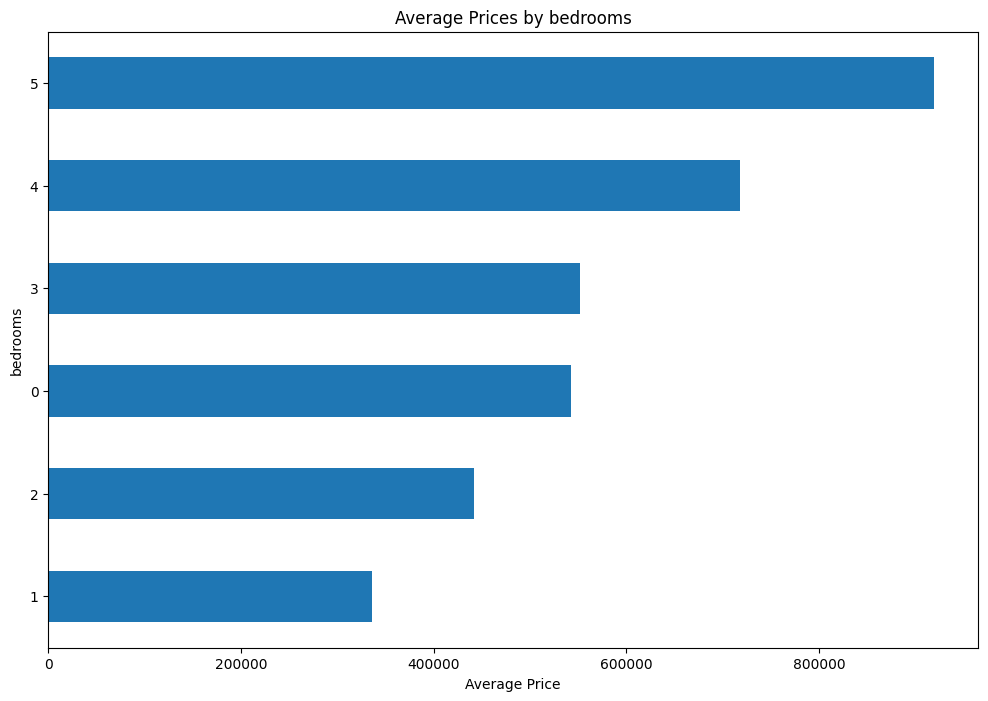

In [95]:
# Calculate the average price for each postal code
avg_prices = df.groupby("bedrooms")["price"].mean().sort_values()

# Plot the horizontal bar graph
plt.figure(figsize=(12, 8))
avg_prices.plot(kind="barh")
plt.xlabel("Average Price")
plt.ylabel("bedrooms")
plt.title("Average Prices by bedrooms")
plt.show()

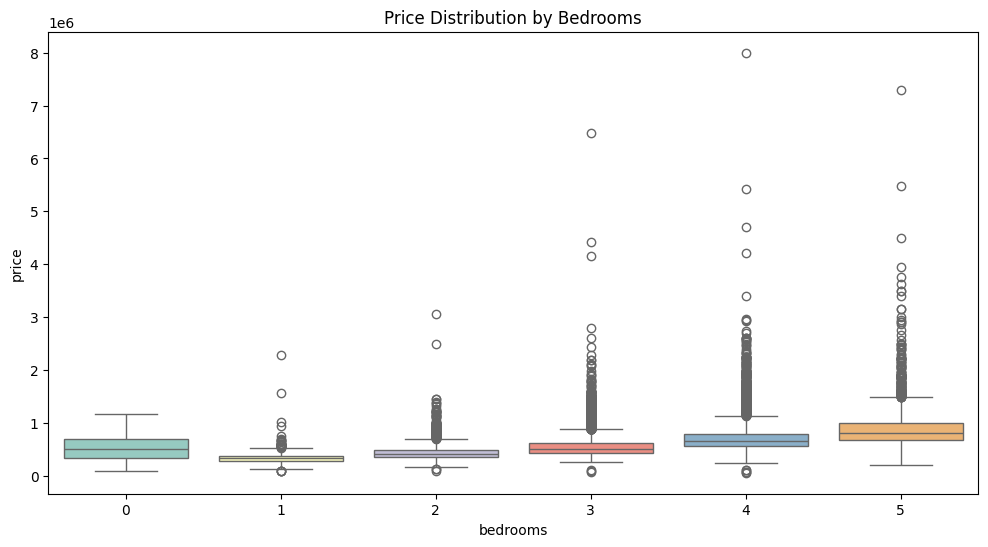

In [99]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="bedrooms", y="price", data=df, palette="Set3")
plt.title("Price Distribution by Bedrooms");

We see that genrally when the number of bedroms increase the price increases, **But** the prices behaves weirldy at the 0 bedroms

In [102]:
# Find more about 0 bedroom properties
len(df[df["bedrooms"] == 0])

30

There are just 30 rows with 0 bedroom, and they don't belong to specific category, so they are probably a missing value

In [103]:
df

,month,post_code,price,property_type,bedrooms
date_sold,,,,,
2007-02-07,2007-02,2607,525000,house,4
2007-02-27,2007-02,2906,290000,house,3
2007-03-07,2007-03,2905,328000,house,3
2007-03-09,2007-03,2905,380000,house,4
2007-03-21,2007-03,2906,310000,house,3
...,...,...,...,...,...
2019-07-25,2019-07,2900,500000,unit,3
2019-07-25,2019-07,2612,560000,unit,2
2019-07-26,2019-07,2912,464950,unit,2


- We have clear seanality in the date, we just need to define when does it happens
- There is a severe drop in prices after 2018, we neeed to understand is that real or the count of sales has deacresed


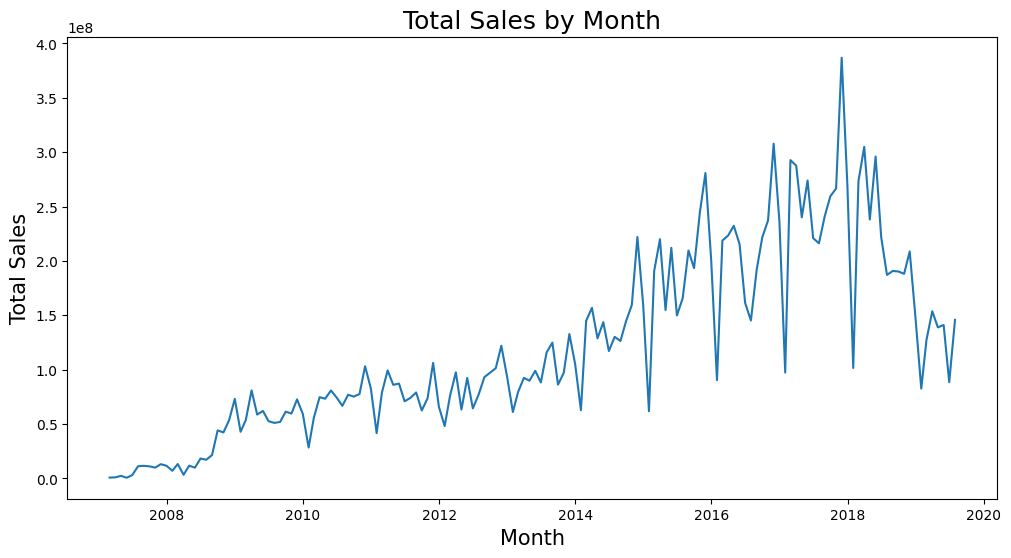

In [ ]:
plt.figure(figsize=(12, 6))

data = df.groupby("month")["price"].sum()
plt.plot_date(data.index, data.values, linestyle="-", marker=None)
plt.title("Total Sales by Month", size=18)
plt.xlabel("Month", size=15)
plt.ylabel("Total Sales", size=15);

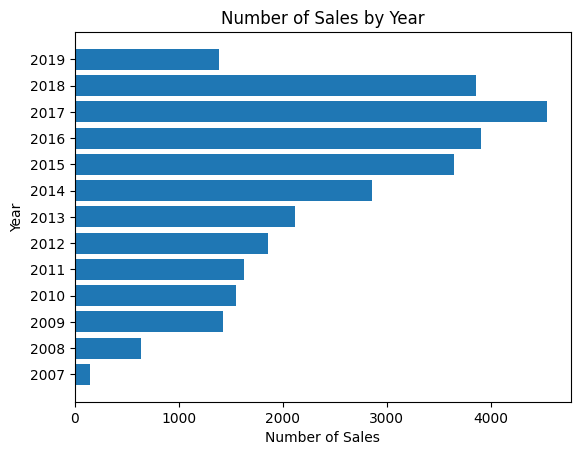

In [139]:
# To identify the weird drop in prices
# I will count the data points in each year

data = df.groupby("year")["price"].count()

plt.barh(data.index, data.values)
plt.title("Number of Sales by Year")
plt.xlabel("Number of Sales")
plt.ylabel("Year")
plt.yticks(data.index)  # Ensure each year is represented on the axis
plt.show()


This means that the increase of trend in related to the increse of number of data points not in the prices them selves

And as we are trying to predict the price of a unit, then the total price per month is not very relevent, but it gives us clear indication that the prices drop at certain months, and there is an abvoius seasonality that repeates itself

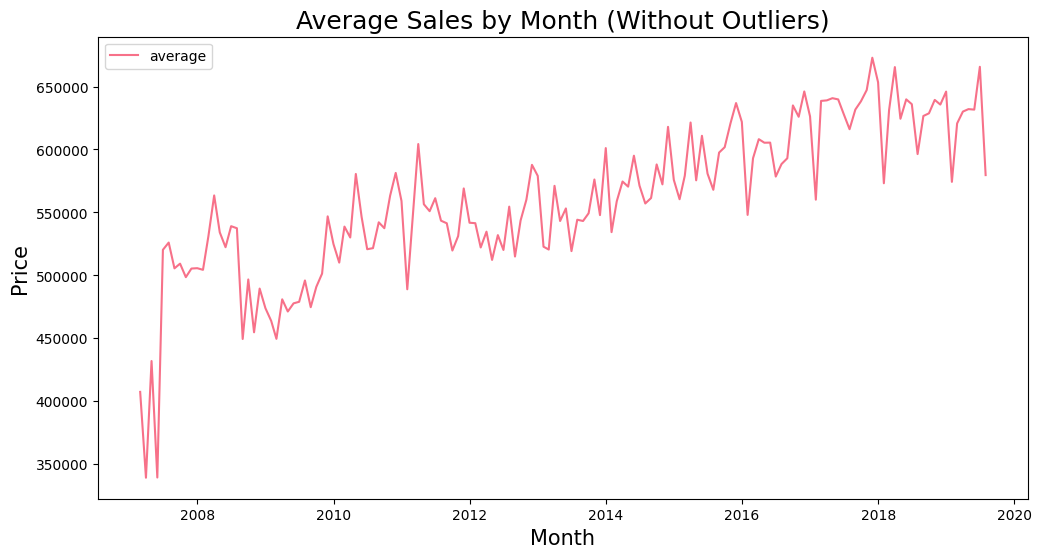

In [160]:
from scipy.stats import zscore

# plot the average data without outliers
# Calculate the z-scores for the prices
df["z_score"] = zscore(df["price"])

# Filter out the outliers
df_no_outliers = df[(df["z_score"] > -3) & (df["z_score"] < 3)]

# Plot the average data without outliers
plt.figure(figsize=(12, 6))

mean_no_outliers = df_no_outliers.groupby("month")["price"].mean()
median_no_outliers = df_no_outliers.groupby("month")["price"].median()

plt.plot_date(
    mean_no_outliers.index,
    mean_no_outliers.values,
    linestyle="-",
    marker=None,
    label="average",
    color=color_palette[0],
)

plt.title("Average Sales by Month (Without Outliers)", size=18)
plt.xlabel("Month", size=15)
plt.ylabel("Price", size=15)
plt.legend()
plt.show()

We can see that the average increases over time  
and there is the same seasonality as total sales per month

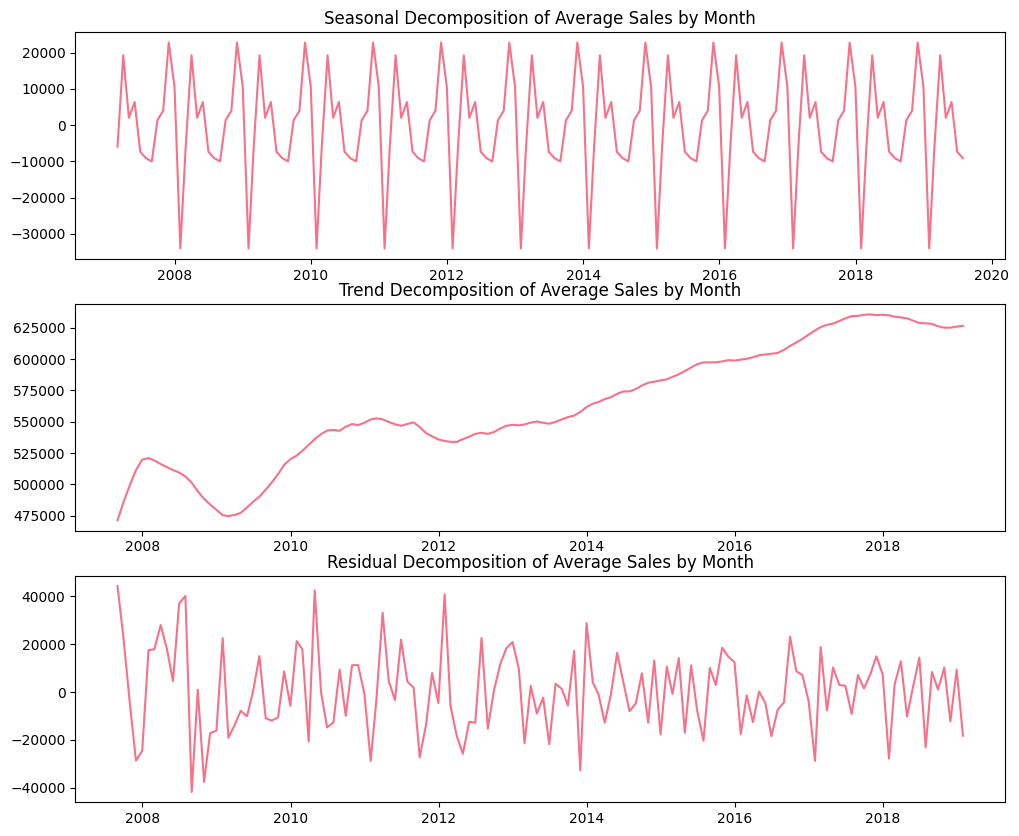

In [175]:
# detect seasonality
from statsmodels.tsa.seasonal import seasonal_decompose


# Decompose the time series
result = seasonal_decompose(
    df_no_outliers.groupby("month")["price"].mean(), model="additive", period=12
)

fig, axes = plt.subplots(3, 1, figsize=(12, 10))

axes[0].plot_date(
    result.seasonal.index,
    result.seasonal.values,
    linestyle="-",
    marker=None,
    label="average",
    color=color_palette[0],
)
axes[0].set_title("Seasonal Decomposition of Average Sales by Month")

axes[1].plot_date(
    result.trend.index,
    result.trend.values,
    linestyle="-",
    marker=None,
    label="average",
    color=color_palette[0],
)
axes[1].set_title("Trend Decomposition of Average Sales by Month")

axes[2].plot_date(
    result.resid.index,
    result.resid.values,
    linestyle="-",
    marker=None,
    label="average",
    color=color_palette[0],
)
axes[2].set_title("Residual Decomposition of Average Sales by Month");

**We have two main conclusions**
- The prices deacrese at the begining of each year
- The trend goes up over time

### Testing if the total sales of that month corelate with the price of the houses sold in the month

In [188]:
# Calculate the total number of sales in each month
total_sales_per_month = df.groupby("month")["price"].count()

# Add a new column to the dataframe to express the total sales in this month
df["total_sales_in_the_month"] = df["month"].map(total_sales_per_month)

df

,month,post_code,price,property_type,bedrooms,year,z_score,total_sales_in_the_month
date_sold,,,,,,,,
2007-02-07,2007-02,2607,525000,house,4,2007,-0.300800,2
2007-02-27,2007-02,2906,290000,house,3,2007,-1.135011,2
2007-03-07,2007-03,2905,328000,house,3,2007,-1.000118,3
2007-03-09,2007-03,2905,380000,house,4,2007,-0.815526,3
2007-03-21,2007-03,2906,310000,house,3,2007,-1.064015,3
...,...,...,...,...,...,...,...,...
2019-07-25,2019-07,2900,500000,unit,3,2019,-0.389546,250
2019-07-25,2019-07,2612,560000,unit,2,2019,-0.176556,250
2019-07-26,2019-07,2912,464950,unit,2,2019,-0.513968,250


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29580 entries, 2007-02-07 to 2019-07-26
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype    
---  ------                    --------------  -----    
 0   month                     29580 non-null  period[M]
 1   post_code                 29580 non-null  object   
 2   price                     29580 non-null  int64    
 3   property_type             29580 non-null  object   
 4   bedrooms                  29580 non-null  category 
 5   year                      29580 non-null  int32    
 6   z_score                   29580 non-null  float64  
 7   total_sales_in_the_month  29580 non-null  int64    
dtypes: category(1), float64(1), int32(1), int64(2), object(2), period[M](1)
memory usage: 1.7+ MB


<Axes: >

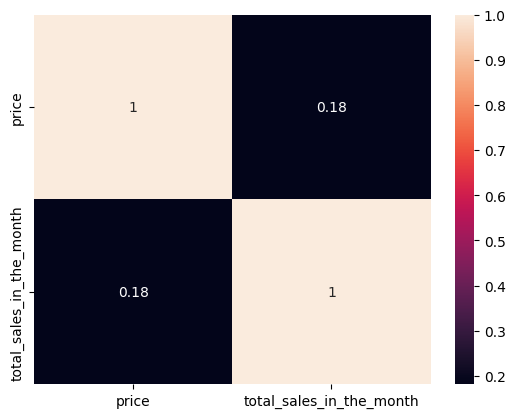

In [197]:
# Plot the correlation matrix
sns.heatmap(df[["price", "total_sales_in_the_month"]].corr(), annot=True)

<Axes: xlabel='total_sales_in_the_month', ylabel='price'>

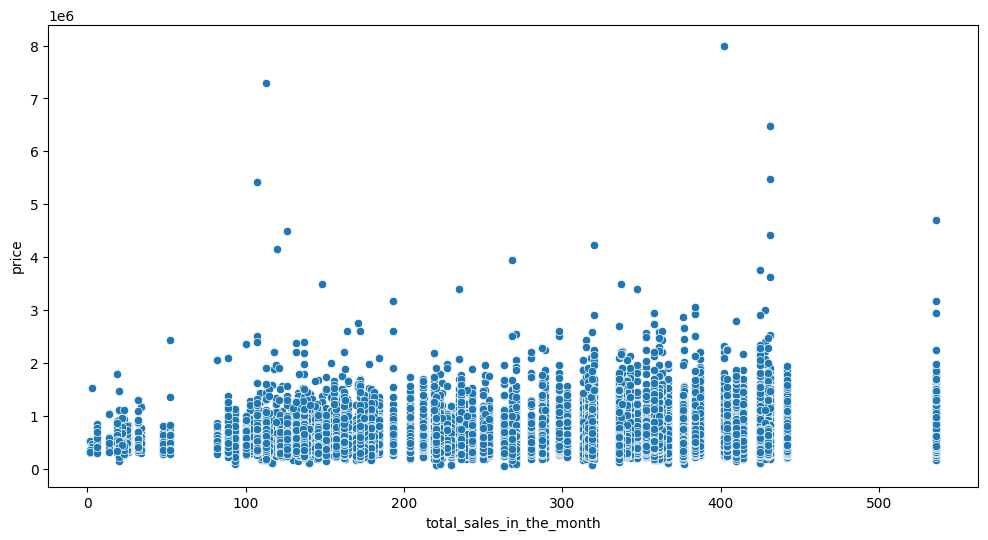

In [198]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x="total_sales_in_the_month", y="price", data=df)

There is no correlation